1. What is Boosting in Machine Learning ?

-> Boosting is a machine learning technique that enhances predictive model accuracy by combining multiple "weak learners" (models that perform slightly better than random guessing) to create a strong learner.

2.  How does Boosting differ from Bagging ?

-> Bagging and boosting are both ensemble methods that combine multiple models to improve prediction accuracy, but they differ in how they train those models. Bagging trains models in parallel on different subsets of the data, reducing variance and often making it less prone to overfitting. Boosting, on the other hand, trains models sequentially, with each model focusing on the errors of the previous one, which can lead to higher accuracy but also requires more careful tuning to avoid overfitting.

3. What is the key idea behind AdaBoost ?

-> The core concept of AdaBoost, or Adaptive Boosting, is to combine multiple "weak learners" (classifiers that are only slightly better than random guessing) to create a strong, accurate classifier. This is achieved by iteratively training weak learners, giving more weight to misclassified data points in each subsequent iteration. The final classifier is a weighted combination of these weak learners, with those that performed better on the training data receiving higher weights.

4. Explain the working of AdaBoost with an example

-> AdaBoost (Adaptive Boosting) is a boosting algorithm that sequentially trains weak learners, focusing on correcting mistakes made by previous learners. It achieves this by assigning weights to training samples and iteratively adjusting these weights, giving more importance to misclassified instances in subsequent rounds. These weak learners are then combined, with each contributing based on its accuracy, to form a strong predictive model.

5. What is Gradient Boosting, and how is it different from AdaBoost  ?

-> Gradient boosting and AdaBoost are both boosting algorithms that build strong learners from weak learners, but they differ in their approach to addressing errors. Gradient boosting focuses on minimizing a differentiable loss function by sequentially fitting weak learners to the residuals of the previous ones, whereas AdaBoost reweights training samples based on their misclassification rate.

6. What is the loss function in Gradient Boosting ?

-> In gradient boosting, the loss function quantifies the difference between a model's predictions and the actual values. It essentially measures how well the model is performing. The algorithm aims to minimize this loss function by sequentially training weak learners, with each new learner focusing on correcting the errors of its predecessors.

7. How does XGBoost improve over traditional Gradient Boosting ?

-> XGBoost improves upon traditional gradient boosting through several key enhancements: regularization for preventing overfitting, optimized tree structure building, efficient missing data handling, parallel processing for speed and scalability, and a unique approximate greedy algorithm.

8. What is the difference between XGBoost and CatBoost ?

-> XGBoost and CatBoost are both powerful gradient boosting algorithms, but they differ in how they handle categorical features and their overall approach to model building. XGBoost requires preprocessing of categorical data, while CatBoost inherently supports it, often leading to faster training and prediction times, especially on large datasets.

9. What are some real-world applications of Boosting techniques ?

->  Boosting algorithms have numerous real-world applications across various industries, including healthcare, finance, and retail. They are particularly effective in scenarios requiring high accuracy, especially when dealing with complex data or when small errors can have significant consequences.

10. How does regularization help in XGBoost ?

-> Regularization in XGBoost helps prevent overfitting and improves the model's ability to generalize to new, unseen data. It does this by penalizing complex models, encouraging simpler ones that are more robust. XGBoost uses regularization through L1 and L2 penalties, which are added to the objective function, effectively limiting the weights of the model's coefficients.

11. What are some hyperparameters to tune in Gradient Boosting models?

-> In Gradient Boosting models, several hyperparameters need tuning to optimize performance. These include learning rate, number of estimators, maximum depth, and regularization parameters. Adjusting these parameters helps control the complexity of the model, prevent overfitting, and improve generalization capabilities.

12. What is the concept of Feature Importance in Boosting ?

-> Feature importance in boosting, a technique used in machine learning, refers to the process of quantifying the contribution of each input feature to the prediction of a target variable. In the context of boosting algorithms like XGBoost, LightGBM, and Random Forests, feature importance helps understand which features are most influential in the model's predictions.

13. Why is CatBoost efficient for categorical data?

-> CatBoost is highly efficient for categorical data due to its ability to handle such data natively, eliminating the need for complex preprocessing steps like one-hot encoding. This reduces the risk of overfitting and data leakage, as CatBoost automatically learns to encode categorical features during training. Additionally, CatBoost's ordered boosting technique helps in mitigating overfitting and maintaining model accuracy.

PRACTICAL

14. Train an AdaBoost Classifier on a sample dataset and print model accuracy

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import  warnings
warnings.filterwarnings('ignore')

x, y = make_classification(n_samples = 1000, n_features= 20, n_classes = 2, random_state = 1)

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size= 0.3,random_state= 1)
classifier = AdaBoostClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print(f'model accuracy, {round(accuracy_score(y_test,y_pred),2)}')


model accuracy, 0.85


15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

In [3]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

x, y = make_regression(n_samples= 1000, n_features= 20, random_state = 1)
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size= 0.3,random_state= 1)
classifier = AdaBoostRegressor()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(f'Mean Absolute Error (MAE): {round(mean_absolute_error(y_test,y_pred),2)}')


Mean Absolute Error (MAE): 60.16


16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np

data = load_breast_cancer()
df= pd.DataFrame(data.data, columns = data.feature_names)
df['target']  = data.target
x = df.drop('target', axis = 1)
y = df.target
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state=2)
classifier = GradientBoostingClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
importances = classifier.feature_importances_
importance_df = pd.DataFrame({'feature': x.columns,
                              'importance' : importances}).sort_values(by = 'importance', ascending = False)

print(importance_df.head(5))

                 feature  importance
22       worst perimeter    0.535760
23            worst area    0.115083
20          worst radius    0.108413
27  worst concave points    0.081331
21         worst texture    0.072316


17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score

In [5]:
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

cls = GradientBoostingRegressor(random_state=2)
cls.fit(x_train,y_train)
y_pred=cls.predict(x_test)
print(f" R-Square Score {round(r2_score(y_test,y_pred),3)}")

 R-Square Score 0.774


18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting

In [6]:
from xgboost import XGBClassifier
x,y = make_classification(n_samples = 1000, n_features = 20, n_classes = 2, random_state=5)
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state=2)

# XGBoost Classifier
cls_xgb = XGBClassifier()
cls_xgb.fit(x_train, y_train)
y_pred_xgb = cls_xgb.predict(x_test)
#Gradient Boosting
cls_gb = GradientBoostingClassifier()
cls_gb.fit(x_train, y_train)
y_pred_gb = cls_gb.predict(x_test)

# accuaries of both the classifiers
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
gb_accuracy =   accuracy_score(y_test, y_pred_gb)

print(f" XGBoost Accuracy {xgb_accuracy} ")
print(f" Gradient Boosting Accuracy {gb_accuracy} ")


 XGBoost Accuracy 0.945 
 Gradient Boosting Accuracy 0.925 


19. Train a CatBoost Classifier and evaluate using F1-Score

In [7]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.9 MB/s eta 0:00:00


In [8]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

cls_catboost =  CatBoostClassifier( verbose=0,random_state=8)
cls_catboost.fit(x_train, y_train)
y_pred=cls_catboost.predict(x_test)

f1 = f1_score(y_test, y_pred)
print(f"F1-Score {f1:.3f}")

F1-Score 0.931


20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)

In [9]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
x, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = XGBRegressor(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.3f}")

Mean Squared Error (MSE): 5530.474


21. Train an AdaBoost Classifier and visualize feature importance

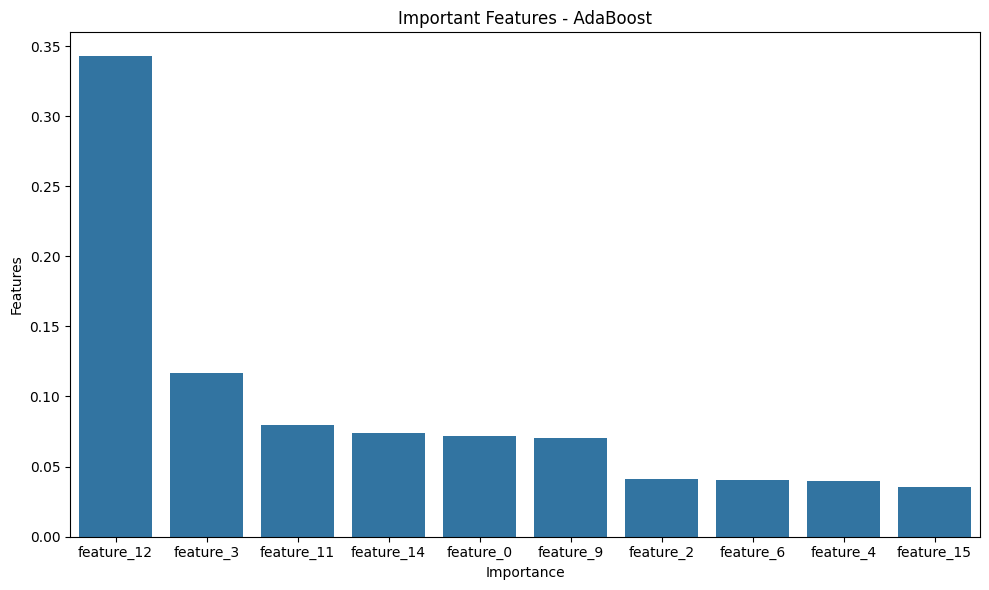

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
x, y = make_classification(n_samples = 1000, n_features= 20, n_classes = 2, random_state = 1)
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size= 0.3,random_state= 1)
classifier = AdaBoostClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

feature_names = [f'feature_{i}' for i in range(x.shape[1])]
features = classifier.feature_importances_

features_df = pd.DataFrame({'features': feature_names,
                            'importance': features}).sort_values(by = 'importance', ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(data = features_df.head(10),x = 'features', y = 'importance')
plt.title('Important Features - AdaBoost')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

22. Train a Gradient Boosting Regressor and plot learning curves

In [11]:
x,y = make_regression(n_samples=1000, n_features= 20, random_state= 7)
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size= 0.3,random_state= 1)
classifier = GradientBoostingRegressor()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

23. Train an XGBoost Classifier and visualize feature importance

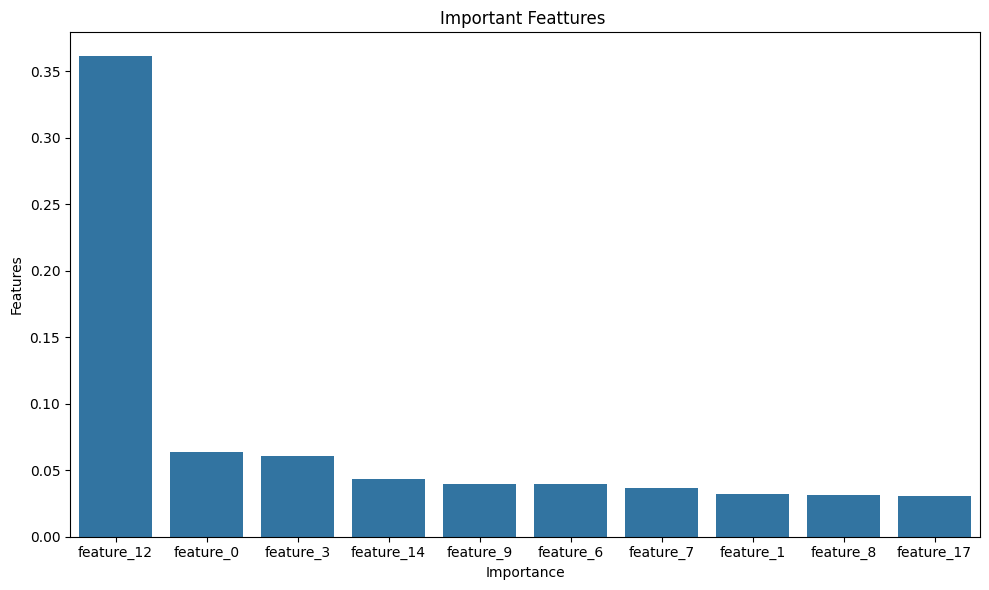

In [12]:
x, y = make_classification(n_samples = 1000, n_features= 20, n_classes = 2, random_state = 1)
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size= 0.3,random_state= 1)
classifier = XGBClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

features_names = [f'feature_{i}' for i in range(x.shape[1])]
features = classifier.feature_importances_
features_df = pd.DataFrame({'features': feature_names,
                            'importance': features}).sort_values(by = 'importance', ascending = False)

plt.figure(figsize = (10,6))
sns.barplot(data = features_df.head(10), x ='features', y = 'importance')
plt.title('Important Feattures ')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

24. Train a CatBoost Classifier and plot the confusion matrix

[[120  19]
 [ 21 140]]


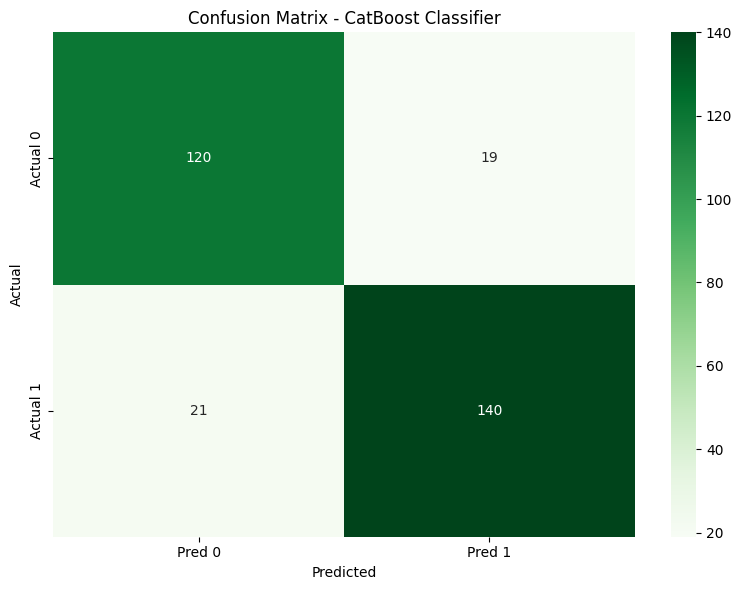

In [13]:
from sklearn.metrics import confusion_matrix
cls =  CatBoostClassifier( verbose=0,random_state=8)
cls.fit(x_train, y_train)
y_pred=cls.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot= True, fmt = 'd',cmap = 'Greens', xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Actual 0', 'Actual 1'] )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.tight_layout()
plt.show()

25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy

In [17]:
from sklearn.model_selection import GridSearchCV
classifier= AdaBoostClassifier()


param_grid = {'n_estimators' : [50,100,200],
              'learning_rate': [0.1,1.0,2.0]}
grid_search = GridSearchCV(estimator = classifier , param_grid= param_grid, verbose = 3, cv= 3)
grid_search.fit(x_train,y_train)
print('best parameters', grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print('model accuracy', round(accuracy_score(y_test,y_pred),2))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END learning_rate=0.1, n_estimators=50;, score=0.872 total time=   0.4s
[CV 2/3] END learning_rate=0.1, n_estimators=50;, score=0.858 total time=   0.3s
[CV 3/3] END learning_rate=0.1, n_estimators=50;, score=0.841 total time=   0.3s
[CV 1/3] END learning_rate=0.1, n_estimators=100;, score=0.872 total time=   0.7s
[CV 2/3] END learning_rate=0.1, n_estimators=100;, score=0.863 total time=   1.0s
[CV 3/3] END learning_rate=0.1, n_estimators=100;, score=0.841 total time=   1.3s
[CV 1/3] END learning_rate=0.1, n_estimators=200;, score=0.876 total time=   1.9s
[CV 2/3] END learning_rate=0.1, n_estimators=200;, score=0.863 total time=   1.3s
[CV 3/3] END learning_rate=0.1, n_estimators=200;, score=0.845 total time=   1.2s
[CV 1/3] END learning_rate=1.0, n_estimators=50;, score=0.855 total time=   0.2s
[CV 2/3] END learning_rate=1.0, n_estimators=50;, score=0.858 total time=   0.2s
[CV 3/3] END learning_rate=1.0, n_estimator

26. Train a Gradient Boosting Classifier and visualize the ROC curve

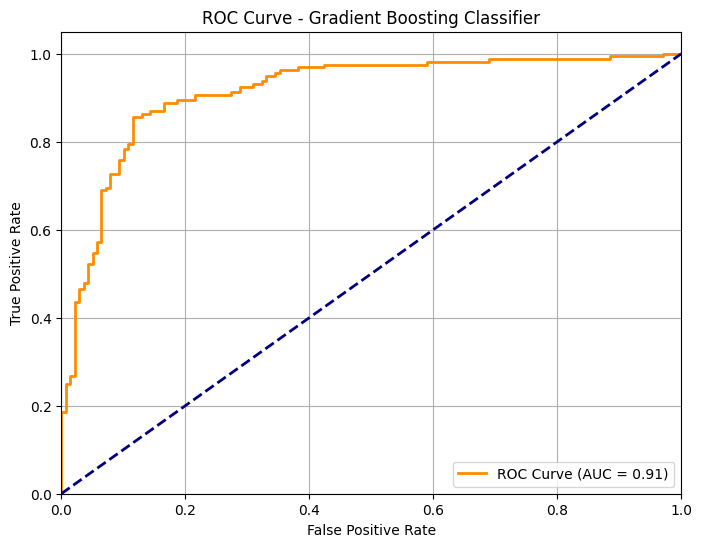

In [23]:
from sklearn.metrics import roc_curve, auc
x, y = make_classification(n_samples = 1000, n_features= 20, n_classes = 2, random_state = 1)
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size= 0.3,random_state= 1)
classifier = GradientBoostingClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_scores = classifier.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV

In [25]:
x,y = make_regression(n_samples=1000, n_features= 20, random_state= 7)
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size= 0.3,random_state= 1)
classifier = XGBRegressor()
param_grid = {'n_estimators' : [50,100,200],
              'learning_rate': [0.1,1.0,2.0]}
grid_search = GridSearchCV(estimator = classifier , param_grid= param_grid, verbose = 3, cv= 3)
grid_search.fit(x_train,y_train)
print('best parameters', grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print('Mean Squared Error', mean_squared_error(y_test,y_pred))
print('R2 score',r2_score(y_test,y_pred))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END learning_rate=0.1, n_estimators=50;, score=0.805 total time=   6.4s
[CV 2/3] END learning_rate=0.1, n_estimators=50;, score=0.819 total time=   3.8s
[CV 3/3] END learning_rate=0.1, n_estimators=50;, score=0.815 total time=   6.4s
[CV 1/3] END learning_rate=0.1, n_estimators=100;, score=0.817 total time=   6.9s
[CV 2/3] END learning_rate=0.1, n_estimators=100;, score=0.832 total time=   3.2s
[CV 3/3] END learning_rate=0.1, n_estimators=100;, score=0.829 total time=   0.6s
[CV 1/3] END learning_rate=0.1, n_estimators=200;, score=0.818 total time=   1.1s
[CV 2/3] END learning_rate=0.1, n_estimators=200;, score=0.833 total time=   1.1s
[CV 3/3] END learning_rate=0.1, n_estimators=200;, score=0.831 total time=   3.2s
[CV 1/3] END learning_rate=1.0, n_estimators=50;, score=0.498 total time=   0.3s
[CV 2/3] END learning_rate=1.0, n_estimators=50;, score=0.524 total time=   0.3s
[CV 3/3] END learning_rate=1.0, n_estimator

29. Train an AdaBoost Classifier and analyze the effect of different learning rates

 learning rate :0.01 ----> accuracy :[0.8466666666666667]
 learning rate :0.1 ----> accuracy :[0.8466666666666667, 0.8466666666666667]
 learning rate :1.0 ----> accuracy :[0.8466666666666667, 0.8466666666666667, 0.8533333333333334]
 learning rate :0.5 ----> accuracy :[0.8466666666666667, 0.8466666666666667, 0.8533333333333334, 0.8533333333333334]
 learning rate :2.0 ----> accuracy :[0.8466666666666667, 0.8466666666666667, 0.8533333333333334, 0.8533333333333334, 0.13333333333333333]


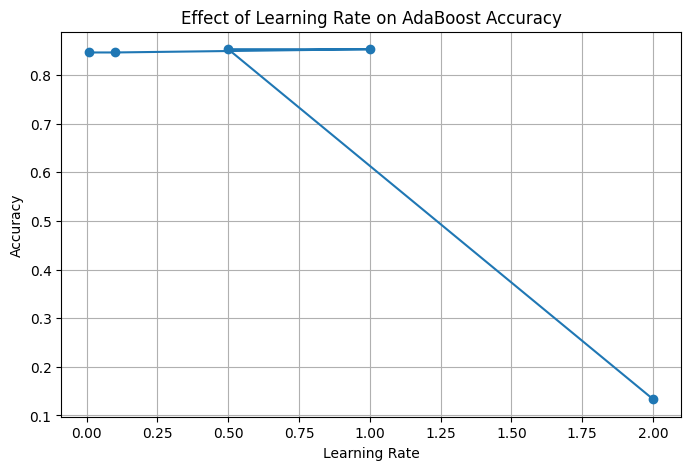

In [36]:
x, y = make_classification(n_samples = 1000, n_features= 20, n_classes = 2, random_state = 1)
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size= 0.3,random_state= 1)
learning_rates = [0.01,0.1,1.0,0.5,2.0]
acc  = []
for lr in learning_rates:
  cls = AdaBoostClassifier(learning_rate= lr, random_state=2)
  cls.fit(x_train,y_train)
  y_pred = cls.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  acc.append(accuracy)
  print(f' learning rate :{lr} ----> accuracy :{acc}')

plt.figure(figsize=(8, 5))
plt.plot(learning_rates, acc, marker='o')
plt.title("Effect of Learning Rate on AdaBoost Accuracy")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss

In [40]:
from sklearn.metrics import log_loss
x, y = make_classification(n_samples=1000, n_features=20,
                           n_classes=3, n_informative=10,
                           random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = XGBClassifier(objective='multi:softprob', num_class=3, eval_metric='mlogloss', use_label_encoder=False)
model.fit(x_train, y_train)

y_proba = model.predict_proba(x_test)

loss = log_loss(y_test, y_proba)
print(f"Log Loss: {loss:.4f}")

Log Loss: 0.4702
